In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('Advertising.csv', index_col=0)
dataset.head()
dataset.info() # no missing value
#dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
X = dataset.iloc[:,:-1]
X.head()
#X.shape

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [4]:
y = dataset.iloc[:,-1]
y.head()
#y.shape

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

C:\Users\avani\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


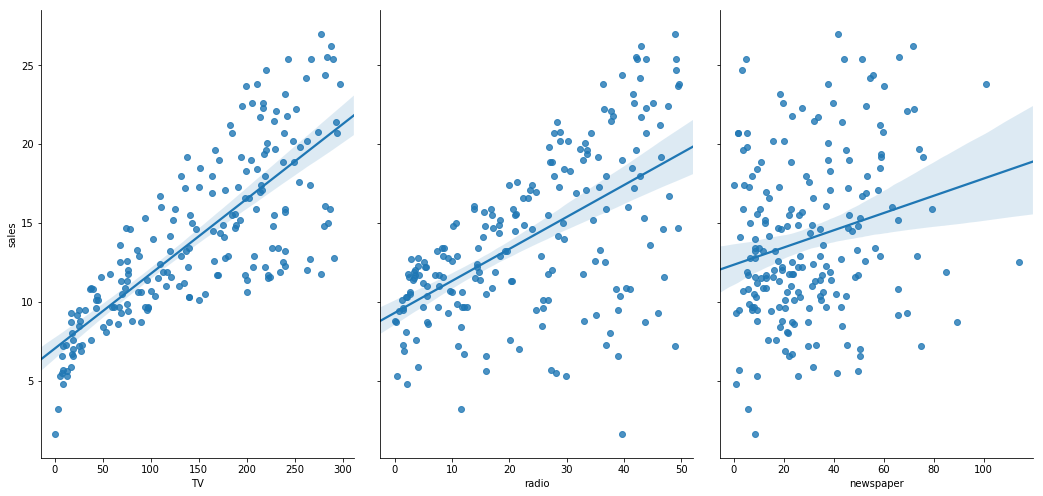

In [6]:
import seaborn as sns
%matplotlib inline

sns.pairplot(dataset,x_vars=['TV', 'radio', 'newspaper'], y_vars= 'sales',height=7,aspect=0.7,kind='reg')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred= regressor.predict(X_test)
print(X_train.shape,'\n',
      X_test.shape,'\n',
      y_train.shape,'\n',
      y_test.shape,'\n',
      y_pred.shape)


(150, 3) 
 (50, 3) 
 (150,) 
 (50,) 
 (50,)


In [11]:
print(regressor.intercept_)
print(regressor.coef_)

2.8925700511511483
[0.04416235 0.19900368 0.00116268]


In [39]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        15:55:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [40]:
New_X = dataset.iloc[:,:-2]
New_X.head()

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [41]:
from sklearn.model_selection import train_test_split
new_X_train,new_X_test,new_y_train,new_y_test = train_test_split(New_X,y,test_size=0.25, random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(new_X_train,new_y_train)
new_y_pred = regressor.predict(new_X_test)

In [43]:
print(regressor.intercept_)
print(regressor.coef_)

2.9109237322037895
[0.04419729 0.19946953]


In [45]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,New_X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5206.
Date:                Sun, 25 Aug 2019   Prob (F-statistic):          6.73e-172
Time:                        16:29:38   Log-Likelihood:                -426.71
No. Observations:                 200   AIC:                             857.4
Df Residuals:                     198   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0548      0.001     42.962      0.0